<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [24]:
#!conda install folium --yes
#!pip install folium

#!pip install geopy

# pygmaps

#!pip install gpxpy
import gpxpy.geo

In [108]:
#imports
import pandas as pd
import gpxpy.geo as gpx
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline


In [4]:
df_raw= pd.read_csv("../eda-telecomm_group_project-lab/datasets/metadata.csv")

In [5]:
df_raw.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [6]:
df_raw.describe()

,Latitude,Longitude
count,10476.000000,10476.000000
mean,-35.136188,150.612841
std,3.141723,1.470169
min,-42.884810,144.848243
25%,-33.884603,151.202296
50%,-33.796610,151.266540
75%,-33.788150,151.266540
max,-33.557310,151.289340


In [7]:
df_raw.dtypes

Cell Cgi                 object
Cell Tower Location      object
Comm Identifier          object
Comm Timedate String     object
Comm Type                object
Latitude                float64
Longitude               float64
dtype: object

In [25]:
df_raw["Comm Type"].unique()

array(['Phone', 'SMS', 'Internet'], dtype=object)

In [30]:
len(df_raw["Latitude"].unique())
len(df_raw["Longitude"].unique())

70

In [37]:
!pip install python-dateutil


In [210]:
#!pip install python-dateutil
from dateutil import parser

def convertDateTimeToWeekOfYearPrecision(string):
    dt = parser.parse(string)
    return int(dt.strftime("%U"))

def convertDateTimeToDayOfYearPrecision(string):
    dt = parser.parse(string)
    return abs(int(dt.strftime("%j")) - 91)

def convertDateTimeToTimeOfDayPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%H")

def convertDateTimeToDayPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%m-%d-%Y")

def convertDateTimeToHourPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%m-%d-%Y %H:00")

df_raw['Comm Day'] = df_raw["Comm Timedate String"].map(convertDateTimeToDayPrecision)
df_raw['Time of Day'] = df_raw["Comm Timedate String"].map(convertDateTimeToTimeOfDayPrecision)
df_raw['Day of Year'] = df_raw["Comm Timedate String"].map(convertDateTimeToDayOfYearPrecision)
df_raw['Week of Year'] = df_raw["Comm Timedate String"].map(convertDateTimeToWeekOfYearPrecision)


In [121]:
df_raw['Comm Type'].unique()


array(['Phone', 'SMS', 'Internet'], dtype=object)

In [142]:

def plotByTimeOfDay(df):
    call_frequency = df[['Time of Day', 'Cell Cgi']].groupby(by='Time of Day').count()
    call_frequency.plot(kind='bar')

In [180]:
df_phone_calls = df_raw[df_raw['Comm Type'] == 'Phone']
df_phone_calls.head()
df_phone_apr1 = df_phone_calls[df_phone_calls['Comm Day'] == '04-05-2014']
#df_sms = df_raw[df_raw['Comm Type'] == 'SMS']
#df_internet = df_raw[df_raw['Comm Type'] == 'Internet']


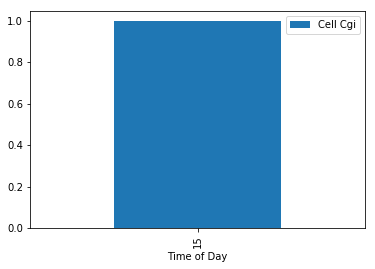

In [181]:
plotByTimeOfDay(df_phone_apr1)

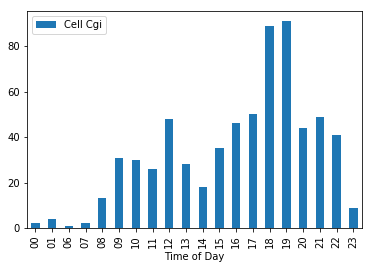

In [133]:
plotByTimeOfDay(df_sms)

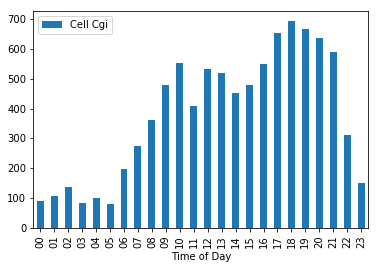

In [134]:
plotByTimeOfDay(df_internet)

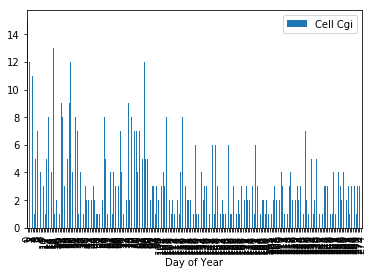

In [208]:
phone_mask = df_raw['Comm Type'] == 'Phone'
phone = df_raw[phone_mask]
phone_counts = phone[['Day of Year', 'Cell Cgi']].groupby(by='Day of Year').count()
phone_counts.plot(kind='bar')

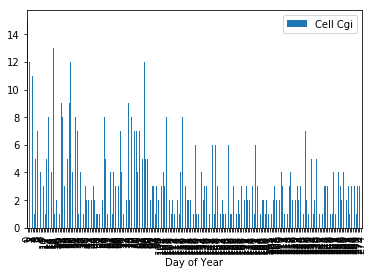

In [209]:
i_mask = df_raw['Comm Type'] == 'Internet'
internet = df_raw[i_mask]
internet_counts = phone[['Day of Year', 'Cell Cgi']].groupby(by='Day of Year').count()
internet_counts.plot(kind='bar')

In [215]:
df_raw.head()


,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,Comm Day,Time of Day,Day of Year,Week of Year
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,04-01-2014,09,0,13
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,04-01-2014,09,0,13
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,04-01-2014,13,0,13
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,04-01-2014,13,0,13
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,04-01-2014,17,0,13


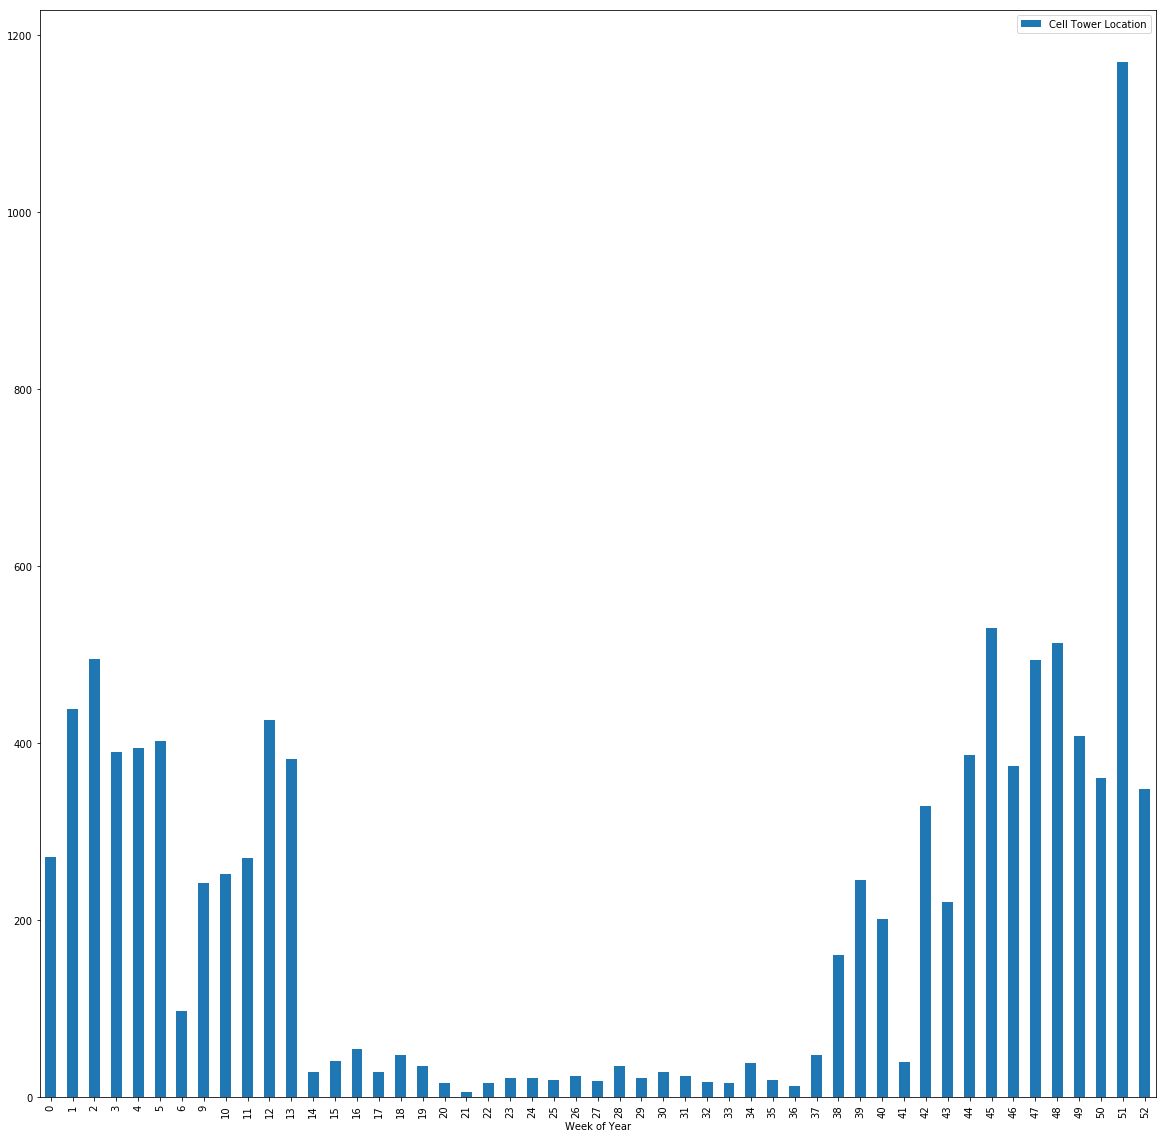

In [225]:
weekly_counts = df_raw[['Week of Year', 'Cell Tower Location']].groupby(by='Week of Year').count()
weekly_counts.plot(kind='bar', figsize=(20, 20))

In [262]:
df_raw

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,Comm Day,Time of Day,Day of Year,Week of Year
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,04-01-2014,09,0,13
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,04-01-2014,09,0,13
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,04-01-2014,13,0,13
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,04-01-2014,13,0,13
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,04-01-2014,17,0,13
5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350,04-01-2014,17,0,13
6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350,04-01-2014,17,0,13
7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296,04-02-2014,19,1,13
8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690,04-03-2014,14,2,13
9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690,04-03-2014,14,2,13


In [261]:
for i in range(0, 365):
    mask = df_raw['Day of Year'] == i
    #print df_raw[mask]['Cell Tower Location'].value_counts()
    if(len(df_raw[mask]['Cell Tower Location'].value_counts())==0):
        print "Day " + str(i) + ": No calls"
    else:
        location = df_raw[mask]['Cell Tower Location'].value_counts().idxmax()
        print "Day " + str(i) + ":" +  location
    
    

Day 0:REDFERN TE
Day 1:REDFERN TE
Day 2:REDFERN TE
Day 3:BEECHWORTH
Day 4:BEECHWORTH
Day 5:BEECHWORTH
Day 6:REDFERN TE
Day 7:REDFERN TE
Day 8:BALGOWLAH HAYES ST
Day 9:BALGOWLAH HAYES ST
Day 10:BALGOWLAH HAYES ST
Day 11:BALGOWLAH HAYES ST
Day 12:BALGOWLAH HAYES ST
Day 13:BALGOWLAH HAYES ST
Day 14:CHIPPENDALE
Day 15:BALGOWLAH HAYES ST
Day 16:BALGOWLAH HAYES ST
Day 17:BALGOWLAH HAYES ST
Day 18:BALGOWLAH HAYES ST
Day 19:BALGOWLAH HAYES ST
Day 20:BALGOWLAH HAYES ST
Day 21:HAYMARKET #
Day 22:BALGOWLAH HAYES ST
Day 23:HAYMARKET #
Day 24:BALGOWLAH HAYES ST
Day 25:BALGOWLAH HAYES ST
Day 26:BALGOWLAH HAYES ST
Day 27:BALGOWLAH HAYES ST
Day 28:BALGOWLAH HAYES ST
Day 29:BALGOWLAH HAYES ST
Day 30:HAYMARKET #
Day 31:SUNDERLAND ST
Day 32: No calls
Day 33:HOBART AIRPORT
Day 34:REDFERN TE
Day 35:REDFERN TE
Day 36:REDFERN TE
Day 37:SYDNEY 2 CASTLEREAGH STREET
Day 38: No calls
Day 39:REDFERN TE
Day 40:REDFERN TE
Day 41:REDFERN TE
Day 42:REDFERN TE
Day 43:HAYMARKET #
Day 44:HAYMARKET #
Day 45:HAYMARKET #
D

In [263]:
#!pip install python-dateutil
from dateutil import parser

def convertDateTimeToWeekOfYearPrecision(string):
    dt = parser.parse(string)
    return int(dt.strftime("%U"))

def convertDateTimeToDayOfYearPrecision(string):
    dt = parser.parse(string)
    return abs(int(dt.strftime("%j")) - 91)

def convertDateTimeToTimeOfDayPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%H")

def convertDateTimeToDayPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%m-%d-%Y")

def convertDateTimeToHourPrecision(string):
    dt = parser.parse(string)
    return dt.strftime("%m-%d-%Y %H:00")

df_raw['Comm Day'] = df_raw["Comm Timedate String"].map(convertDateTimeToDayPrecision)
df_raw['Time of Day'] = df_raw["Comm Timedate String"].map(convertDateTimeToTimeOfDayPrecision)
df_raw['Day of Year'] = df_raw["Comm Timedate String"].map(convertDateTimeToDayOfYearPrecision)
df_raw['Week of Year'] = df_raw["Comm Timedate String"].map(convertDateTimeToWeekOfYearPrecision)

for i in range(0, 365):
    mask = df_raw['Day of Year'] == i
    #print df_raw[mask]['Cell Tower Location'].value_counts()
    if(len(df_raw[mask]['Cell Tower Location'].value_counts())==0):
        print "Day " + str(i) + ": No calls"
    else:
        location = df_raw[mask]['Cell Tower Location'].value_counts().idxmax()
        print "Day " + str(i) + ":" +  location

Day 0:REDFERN TE
Day 1:REDFERN TE
Day 2:REDFERN TE
Day 3:BEECHWORTH
Day 4:BEECHWORTH
Day 5:BEECHWORTH
Day 6:REDFERN TE
Day 7:REDFERN TE
Day 8:BALGOWLAH HAYES ST
Day 9:BALGOWLAH HAYES ST
Day 10:BALGOWLAH HAYES ST
Day 11:BALGOWLAH HAYES ST
Day 12:BALGOWLAH HAYES ST
Day 13:BALGOWLAH HAYES ST
Day 14:CHIPPENDALE
Day 15:BALGOWLAH HAYES ST
Day 16:BALGOWLAH HAYES ST
Day 17:BALGOWLAH HAYES ST
Day 18:BALGOWLAH HAYES ST
Day 19:BALGOWLAH HAYES ST
Day 20:BALGOWLAH HAYES ST
Day 21:HAYMARKET #
Day 22:BALGOWLAH HAYES ST
Day 23:HAYMARKET #
Day 24:BALGOWLAH HAYES ST
Day 25:BALGOWLAH HAYES ST
Day 26:BALGOWLAH HAYES ST
Day 27:BALGOWLAH HAYES ST
Day 28:BALGOWLAH HAYES ST
Day 29:BALGOWLAH HAYES ST
Day 30:HAYMARKET #
Day 31:SUNDERLAND ST
Day 32: No calls
Day 33:HOBART AIRPORT
Day 34:REDFERN TE
Day 35:REDFERN TE
Day 36:REDFERN TE
Day 37:SYDNEY 2 CASTLEREAGH STREET
Day 38: No calls
Day 39:REDFERN TE
Day 40:REDFERN TE
Day 41:REDFERN TE
Day 42:REDFERN TE
Day 43:HAYMARKET #
Day 44:HAYMARKET #
Day 45:HAYMARKET #
D